In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import xgboost as xgb

In [3]:
xgb.__version__

'1.1.1'

In [4]:
DATA_DIR_PATH = os.path.join('..', '..', 'data')

def laod_data(file_name):
  file_path = os.path.join(DATA_DIR_PATH, file_name)
  return pd.read_csv(file_path, header=0)

In [5]:
df_train = laod_data('bookmark_train_data.csv')
print(len(df_train))
df_train.head(3)

199


,ncode,title,category,bookmark_cat,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,...,kw_最強,kw_スキル,kw_魔法,kw_異世界転生,kw_ご都合主義,kw_ハッピーエンド,kw_書籍化,kw_おっさん,kw_残酷な描写あり,rating
0,n4366gd,雷帝の軌跡 ～俺だけ使える【雷魔術】で最強の魔術師を目指します～,ハイファンタジー〔ファンタジー〕,1,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,...,0,0,0,1,0,0,0,0,1,3.0
1,n7336gg,星斬りの剣士,ハイファンタジー〔ファンタジー〕,1,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,...,0,0,0,0,0,0,0,0,1,4.0
2,n9677fw,落ちこぼれ国を出る〜実は世界で４人目の付与術師だった件について〜,ハイファンタジー〔ファンタジー〕,1,1.575176e+09,1.593429e+09,59880,3090,10230,0.051603,...,0,0,0,1,0,1,0,0,1,3.0


In [6]:
# df_test = laod_data('ranking_test_data.csv')
# print(len(df_test))
# df_test.head(3)

In [7]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
cat_le.fit(df_train['category'])


def data_preprocess(df):
  new_df = df.drop(['ncode', 'title', 'bookmark_cat'], axis=1)

  new_df['category'] = cat_le.transform(new_df['category'])

  new_df['rating'] = new_df['rating'] * 10
  new_df = new_df.astype({'rating': 'int32'})

  kw_columns = [col for col in new_df.columns if col.find('kw_') != -1]
  new_df = new_df.drop(kw_columns, axis=1)

  wc_columns = [col for col in new_df.columns if col.find('wc_') != -1]
  new_df = new_df.drop(wc_columns, axis=1)

  return new_df

In [8]:
df_train2 = data_preprocess(df_train)
df_train2.head(3)

,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,new_line_count_avg,talk_char_count_avg,new_line_count_rate_avg,talk_char_count_rate_avg,rating
0,6,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,0.313515,3078.0,128.0,965.0,0.041585,0.313515,30
1,6,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,0.063559,2596.0,138.0,165.0,0.053159,0.063559,40
2,6,1.575176e+09,1.593429e+09,59880,3090,10230,0.051603,0.170842,1996.0,103.0,341.0,0.051603,0.170842,30


In [9]:
X = df_train2.drop(['rating'], axis=1).values
y = df_train2['rating'].values
print(X.shape, y.shape)

(199, 13) (199,)


In [10]:
df_train2.keys()

Index(['category', 'created_at', 'updated_at', 'char_count_sum',
       'new_line_count_sum', 'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'rating'],
      dtype='object')

In [11]:
print(y)

u, counts = np.unique(y, return_counts=True)
print(len(u))
print(u)
print(counts)

[30 40 30 40 30 30 30 40 50 20 40 40 30 30 50 40 40 40 30 25 20 30 20 40
 40 40 35 30 20 20 40 30 40 20 30 20 35 20 20 30 35 35 35 10 30 45 75 60
 15 60 60 30 60 45 45 30 45 45 45 52 15 15 45 45 52 45 60 15 45 45 52 45
 45 75 45 45 52 60 52 67 60 45 45 60 52 45 52 67 60 52 10 15  5 17 15 10
 15 15 10 15 15 10  5 10 15 15 15 10 10 10 15 15 10 15 10 10 15  5  5  5
  5  5  5  5 10  5  5  5  5 10 15 10 15 15 10 10  5 15 10 10 15 15 15 10
  5  5 15 17 15 15 10 10 15 15 15 10  5  5 15 15 15 15 17 10 10 15 15 15
 15 15 15 15 10 15  5 15 17 15 17 15 15 15 15 15 10 15 15 15 15 15 15 15
 15 15 10 15 15 10 15]
15
[ 5 10 15 17 20 25 30 35 40 45 50 52 60 67 75]
[19 29 61  5  9  1 16  5 13 18  2  8  9  2  2]


### OverSampling

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)

u, counts = np.unique(y_resampled, return_counts=True)
print(len(u))
print(u)
print(counts)

(915, 13) (915,)
15
[ 5 10 15 17 20 25 30 35 40 45 50 52 60 67 75]
[61 61 61 61 61 61 61 61 61 61 61 61 61 61 61]


In [14]:
import seaborn as sns

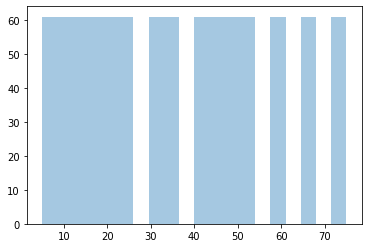

In [15]:
sns.distplot(y_resampled, kde=False, rug=False, bins=20)

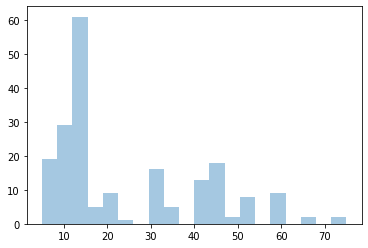

In [16]:
sns.distplot(y, kde=False, rug=False, bins=20)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE(random_state=0)
#smote = SMOTE(random_state=0, k_neighbors=10)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape, y_resampled.shape)

u, counts = np.unique(y_resampled, return_counts=True)
print(len(u))
print(u)
print(counts)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [19]:
print(y_resampled)

[30 40 30 40 30 30 30 40 50 20 40 40 30 30 50 40 40 40 30 25 20 30 20 40
 40 40 35 30 20 20 40 30 40 20 30 20 35 20 20 30 35 35 35 10 30 45 75 60
 15 60 60 30 60 45 45 30 45 45 45 52 15 15 45 45 52 45 60 15 45 45 52 45
 45 75 45 45 52 60 52 67 60 45 45 60 52 45 52 67 60 52 10 15  5 17 15 10
 15 15 10 15 15 10  5 10 15 15 15 10 10 10 15 15 10 15 10 10 15  5  5  5
  5  5  5  5 10  5  5  5  5 10 15 10 15 15 10 10  5 15 10 10 15 15 15 10
  5  5 15 17 15 15 10 10 15 15 15 10  5  5 15 15 15 15 17 10 10 15 15 15
 15 15 15 15 10 15  5 15 17 15 17 15 15 15 15 15 10 15 15 15 15 15 15 15
 15 15 10 15 15 10 15  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17

In [20]:
pd.DataFrame(X_resampled[-15:])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,10.0,1.418559e+09,1.590678e+09,102390.0,4680.0,12930.0,0.045708,0.126282,3413.0,156.0,431.0,0.045708,0.126282
1,6.0,1.437574e+09,1.498781e+09,64170.0,3090.0,11790.0,0.048153,0.183731,2139.0,103.0,393.0,0.048153,0.183731
2,6.0,1.437574e+09,1.498781e+09,64170.0,3090.0,11790.0,0.048153,0.183731,2139.0,103.0,393.0,0.048153,0.183731
3,6.0,1.437574e+09,1.498781e+09,64170.0,3090.0,11790.0,0.048153,0.183731,2139.0,103.0,393.0,0.048153,0.183731
4,6.0,1.437574e+09,1.498781e+09,64170.0,3090.0,11790.0,0.048153,0.183731,2139.0,103.0,393.0,0.048153,0.183731
5,6.0,1.437574e+09,1.498781e+09,64170.0,3090.0,11790.0,0.048153,0.183731,2139.0,103.0,393.0,0.048153,0.183731
6,10.0,1.418559e+09,1.590678e+09,102390.0,4680.0,12930.0,0.045708,0.126282,3413.0,156.0,431.0,0.045708,0.126282
7,10.0,1.418559e+09,1.590678e+09,102390.0,4680.0,12930.0,0.045708,0.126282,3413.0,156.0,431.0,0.045708,0.126282
8,10.0,1.418559e+09,1.590678e+09,102390.0,4680.0,12930.0,0.045708,0.126282,3413.0,156.0,431.0,0.045708,0.126282
9,10.0,1.418559e+09,1.590678e+09,102390.0,4680.0,12930.0,0.045708,0.126282,3413.0,156.0,431.0,0.045708,0.126282


In [21]:
from sklearn.model_selection import train_test_split

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=1)

In [22]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(640, 13) (640,)
(275, 13) (275,)


In [23]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [24]:
print(dtrain.feature_names)

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']


In [25]:
xgb_params = {
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
}

evals = [(dtrain, 'train'), (dval, 'eval')]
evals_result = {}

bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=100,
                early_stopping_rounds=20,
                evals=evals,
                evals_result=evals_result)

[13:26:09] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:29.75280	eval-rmse:31.08209
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[1]	train-rmse:22.06282	eval-rmse:22.95110
[2]	train-rmse:16.53306	eval-rmse:17.30501
[3]	train-rmse:12.88792	eval-rmse:13.49941
[4]	train-rmse:10.50371	eval-rmse:11.19217
[5]	train-rmse:8.53534	eval-rmse:9.31291
[6]	train-rmse:7.32426	eval-rmse:8.38425
[7]	train-rmse:5.95781	eval-rmse:7.45253
[8]	train-rmse:5.36988	eval-rmse:6.92084
[9]	train-rmse:4.67796	eval-rmse:6.40690
[10]	train-rmse:4.15076	eval-rmse:6.12151
[11]	train-rmse:3.87967	eval-rmse:5.99376
[12]	train-rmse:3.54662	eval-rmse:5.77182
[13]	train-rmse:3.25374	eval-rmse:5.54932
[14]	train-rmse:3.10294	eval-rmse:5.43070
[15]	train-rmse:2.98940	eval-rmse:5.36019
[16]	train-rmse:2.71467	eval-rmse:5.

In [26]:
import math
from sklearn.metrics import mean_squared_error

y_pred = bst.predict(dval)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 4.562412574013034


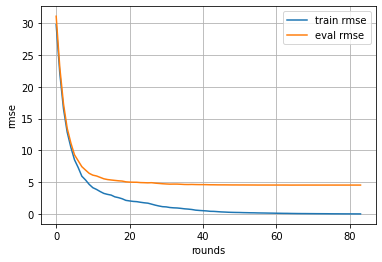

In [27]:
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')

eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')

plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

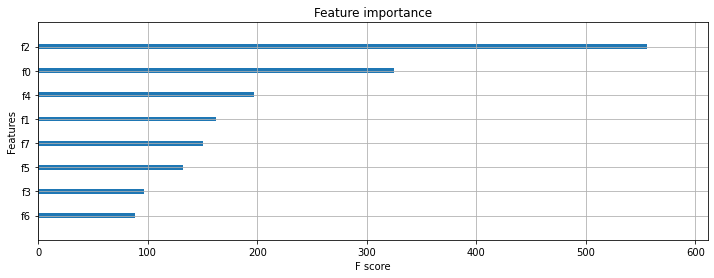

In [28]:
_, ax = plt.subplots(figsize=(12, 4))

xgb.plot_importance(bst,ax=ax,
                    importance_type='gain',
                    show_values=False)

plt.show()

{'f0': 'category', 'f1': 'created_at', 'f2': 'updated_at', 'f3': 'char_count_sum', 'f4': 'new_line_count_sum', 'f5': 'talk_char_count_sum', 'f6': 'new_line_count_rate_sum', 'f7': 'talk_char_count_rate_sum', 'f8': 'char_count_avg', 'f9': 'new_line_count_avg', 'f10': 'talk_char_count_avg', 'f11': 'new_line_count_rate_avg', 'f12': 'talk_char_count_rate_avg', 'f13': 'rating'}
{'updated_at': 374, 'char_count_sum': 318, 'new_line_count_rate_sum': 236, 'created_at': 579, 'category': 137, 'new_line_count_sum': 200, 'talk_char_count_sum': 174, 'talk_char_count_rate_sum': 116}


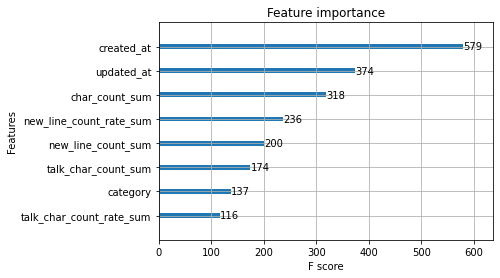

In [29]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(df_train2.columns)}
print(mapper)

mapped = {mapper[k]: v for k, v in bst.get_fscore().items()}
print(mapped)

xgb.plot_importance(mapped)

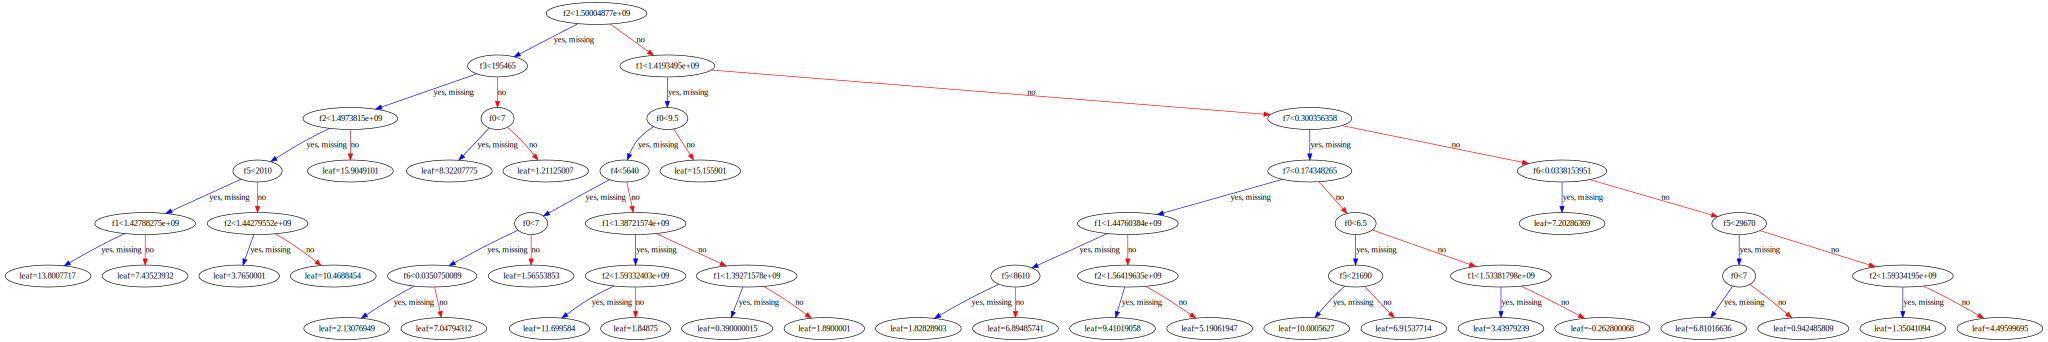

In [30]:
xgb.to_graphviz(bst, num_trees=1)

In [31]:
df_test = laod_data('ranking_test_data.csv')
print(len(df_test))
df_test.head(3)

65


,ncode,title,category,bookmark_cat,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,...,kw_シリアス,kw_男主人公,kw_バトル,kw_もふもふ,kw_成り上がり,kw_勇者,kw_女主人公,kw_貴族,kw_乙女ゲーム,rating
0,n8642gc,聖貨を集めて、ぶん回せ！,ハイファンタジー〔ファンタジー〕,-1,1.585469e+09,1.593763e+09,37740,2310,0,0.061208,...,0,0,0,0,0,0,1,0,0,-1
1,n8693gg,十年目、帰還を諦めた転移者はいまさら主人公になる,ハイファンタジー〔ファンタジー〕,-1,1.591009e+09,1.593774e+09,144330,5760,44100,0.039909,...,0,0,0,0,0,0,0,0,0,-1
2,n4452ge,俺だけレベルが上がる世界で悪徳領主になっていた,ハイファンタジー〔ファンタジー〕,-1,1.587737e+09,1.593006e+09,156720,6210,13290,0.039625,...,0,1,0,0,0,0,0,0,0,-1


In [32]:
df_test2 = data_preprocess(df_test)
df_test2.head(3)

,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,new_line_count_avg,talk_char_count_avg,new_line_count_rate_avg,talk_char_count_rate_avg,rating
0,6,1.585469e+09,1.593763e+09,37740,2310,0,0.061208,0.000000,1258.0,77.0,0.0,0.061208,0.000000,-10
1,6,1.591009e+09,1.593774e+09,144330,5760,44100,0.039909,0.305550,4811.0,192.0,1470.0,0.039909,0.305550,-10
2,6,1.587737e+09,1.593006e+09,156720,6210,13290,0.039625,0.084801,5224.0,207.0,443.0,0.039625,0.084801,-10


In [33]:
X = df_test2.drop(['rating'], axis=1).values
y = df_test2['rating'].values
print(X.shape)

#dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X, label=y)
print(dtest)

(65, 13)


In [34]:
y_pred = bst.predict(dtest)
#y_pred

In [35]:
df_rating = pd.DataFrame(columns=['ncode', 'title', 'rating'])

for i, y in enumerate(y_pred):
    row = df_test.loc[i] 
    #print('{}\t{}\t{}'.format(row.ncode, row.title, y))
    df_rating = df_rating.append({'ncode': row.ncode, 'title': row.title, 'rating': y}, ignore_index=True)

In [36]:
#df_rating.head()

In [37]:
df_rating.describe()

,rating
count,65.000000
mean,27.158392
std,10.201319
min,6.686107
25%,20.355913
50%,25.899504
75%,33.004189
max,51.416603


In [38]:
df_rating.var()

rating    104.066905
dtype: float64

In [39]:
df_rating.median()

rating    25.899504
dtype: float64

In [40]:
pd.set_option('display.max_rows', None)

df_rating.sort_values('rating', ascending=False)

,ncode,title,rating
12,n7657bb,かわいいコックさん,51.416603
51,n4499gh,よいこの世界統一せんそう！,50.011169
60,n5645ci,自分が異世界に転移するなら,49.765095
63,n6078gg,イントゥ・ザ・ゴーレム！～土くれに生まれ変わった私は自己改造で進化する～,45.284824
4,n6812gh,悪徳領主の息子に転生！？ ～普通に行動しているだけなのに、周囲からちやほやされます～,44.399742
40,n2421eu,転生幼女はあきらめない,44.321426
0,n8642gc,聖貨を集めて、ぶん回せ！,43.076233
8,n0512gh,『錬金BOX』で生産チート+付与無双～無能と罵られ侯爵家を追放されたが、なんでも錬成できる箱...,43.013569
2,n4452ge,俺だけレベルが上がる世界で悪徳領主になっていた,39.426468
42,n0229fv,植物魔法チートでのんびり領主生活始めます～前世の知識を駆使して農業したら、逆転人生始まった件～,37.930542
